In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pylab as plb

In [ ]:
def fit(x, y, k=0):
  n = len(x)
  mean = sum(x*y)/sum(y)
  if k==1:
    sigma = sum(y*(x-mean)**2)/sum(y)
  else:
    sigma = sum(y*(x-mean)**2)
  print(mean, sigma)
  def gaus(x,a,x0,sigma):
      return a*np.exp(-(x-x0)**2/(2*sigma**2))

  popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])

  plt.plot(x,y,label='data')
  plt.plot(x,gaus(x,*popt),'r',label='fit')
  plt.legend()
  return gaus(x,*popt), popt

In [ ]:
with open('/content/HI_3627_data.csv') as csv_file_3627:
  data_3627 = np.loadtxt(csv_file_3627, delimiter=',')
  data_3627[:,0] = data_3627[:,0]/1000
  wei_vel_3627 = np.sum(data_3627[:,0]*data_3627[:,1])/np.sum(data_3627[:,1])
  print('Weighted velocity', wei_vel_3627)

Weighted velocity 726.3010769565284


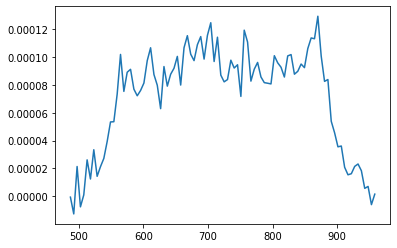

In [ ]:
plt.plot(data_3627[:,0], data_3627[:,1])

In [ ]:
x_3627 = data_3627[:,0]
y_3627 = data_3627[:,1]

726.301076956528 73.70679865845212


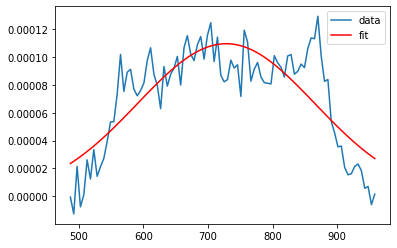

In [ ]:
g_3627, p_3627 = fit(x_3627, y_3627)

In [ ]:
v_rot_obs_3627 = 2*np.abs(p_3627[2])*(np.log(2)*2)**0.5

In [ ]:
v_rot_3627 = v_rot_obs_3627/np.sin(np.pi*62/180)

In [ ]:
with open('/content/HI_5055_data.csv') as csv_file_5055:
  data_5055 = np.loadtxt(csv_file_5055, delimiter=',')
  data_5055[:,0] = data_5055[:,0]/1000
  wei_vel_5055 = np.sum(data_5055[:,0]*data_5055[:,1])/np.sum(data_5055[:,1])
  print('Weighted velocity', wei_vel_5055)

Weighted velocity 501.8029979044973


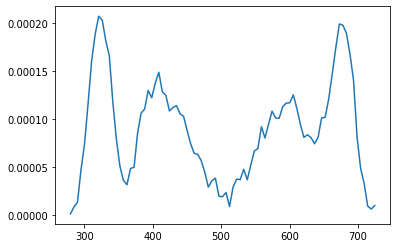

In [ ]:
plt.plot(data_5055[:,0], data_5055[:,1])

In [ ]:
x_5055 = data_5055[:,0]
y_5055 = data_5055[:,1]

In [ ]:
x1 = x_5055[x_5055<370]
y1 = y_5055[x_5055<370]

326.0590471272815 300.5024083709945


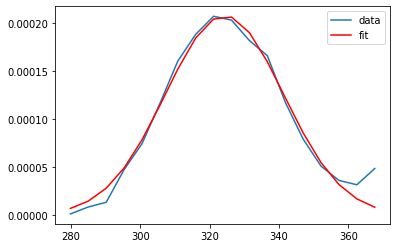

In [ ]:
g1_5055, par1_5055 = fit(x1, y1, 1)

In [ ]:
x2 = x_5055[x_5055>650]
y2 = y_5055[x_5055>650]

677.6871183350659 233.7961958726253


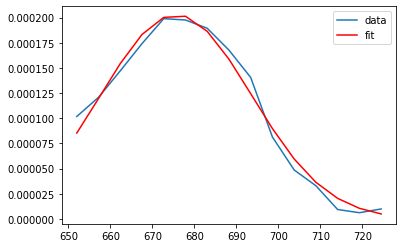

In [ ]:
g2_5055, par2_5055 = fit(x2, y2, 1)

In [ ]:
v_rot_obs_5055 = par2_5055[1]-par1_5055[1] + (2*np.log(2))**0.5 *np.abs((par1_5055[2]+par2_5055[2]))

In [ ]:
v_rot_5055 = v_rot_obs_5055/np.sin(np.pi*59/180)

In [ ]:
print(v_rot_3627, v_rot_5055)

366.8562676299307 457.9650117686904
